In [32]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [33]:
filenames = os.listdir("E://dogs-vs-cats//train")
category = []
for filename in filenames:
    x = filename[0:3]
    if x == 'dog':
        category.append(x)
    else:
        category.append(x)

df = pd.DataFrame({
    'filename': filenames,
    'category': category
})

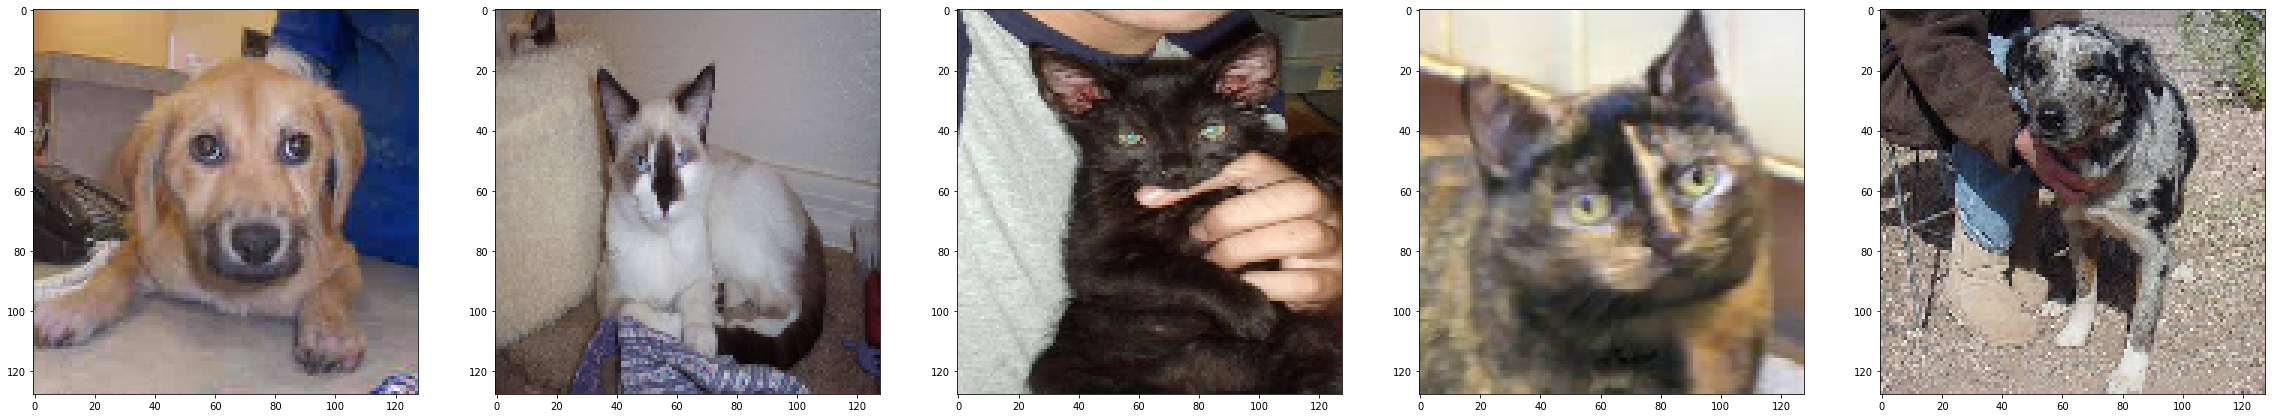

In [34]:
train_data = []
for i in range(0,5):
    sample = random.choice(filenames)
    image = load_img("E://dogs-vs-cats//train//"+sample,target_size=(128,128))
    train_data.append(image)
    
def plot_img(image_data):
  fig,axes=plt.subplots(1,5)
  fig.set_size_inches(40,20)
  for i in range(0,5):
    axes[i].imshow(image_data[i])
  plt.show()

plot_img(train_data)

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)       

In [36]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=30)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

df.head()

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [37]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "E://dogs-vs-cats//train//", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "E://dogs-vs-cats//train//", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [66]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 4)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

batch_size = 15
model.fit(train_generator, epochs=20,validation_data=validation_generator,validation_steps=total_validate//batch_size,
          steps_per_epoch=total_train//batch_size,callbacks=callbacks)

Epoch 1/20
1333/1333 [==============================] - 960s 720ms/step - loss: 0.7377 - accuracy: 0.6375 - val_loss: 0.5367 - val_accuracy: 0.7269
Epoch 2/20
1333/1333 [==============================] - 977s 733ms/step - loss: 0.5540 - accuracy: 0.7253 - val_loss: 0.7811 - val_accuracy: 0.6358
Epoch 3/20
1333/1333 [==============================] - 963s 723ms/step - loss: 0.4922 - accuracy: 0.7673 - val_loss: 0.4494 - val_accuracy: 0.7996
Epoch 4/20
1333/1333 [==============================] - 928s 696ms/step - loss: 0.4603 - accuracy: 0.7896 - val_loss: 0.4334 - val_accuracy: 0.8108
Epoch 5/20
1333/1333 [==============================] - 972s 729ms/step - loss: 0.4289 - accuracy: 0.8071 - val_loss: 0.4311 - val_accuracy: 0.8030
Epoch 6/20
1333/1333 [==============================] - ETA: 0s - loss: 0.4121 - accuracy: 0.8179
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 [==============================] - 985s 739ms/step - loss: 0.4121 - accu

In [38]:
# model.save("model_final.h5")

In [39]:
test_filenames = os.listdir("E://DatasetDogsAndCats//test_new//")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

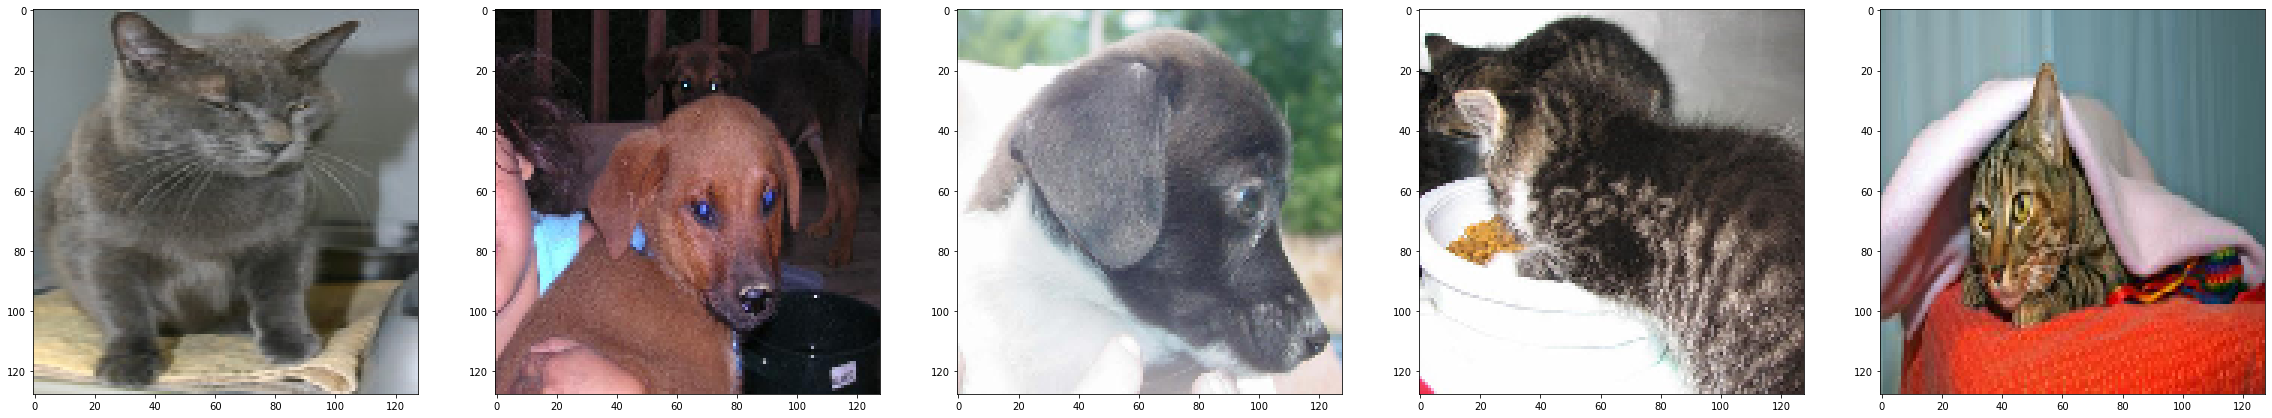

In [40]:
test_data = []
for i in range(0,5):
    sample = random.choice(test_filenames)
    image = load_img("E://DatasetDogsAndCats//test_new//"+sample,target_size=(128,128))
    test_data.append(image)

plot_img(test_data)

In [41]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "E://DatasetDogsAndCats//test_new//", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=15,
    shuffle=False
)

Found 4998 validated image filenames.


In [42]:
from keras.models import load_model
model = load_model("model_final.h5")

In [43]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/15))

In [51]:
test_df['category'] = np.argmax(predict, axis=1)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })
test_df.head()

,filename,category
0,cat0.jpg,0
1,cat1.jpg,0
2,cat10.jpg,0
3,cat100.jpg,0
4,cat1000.jpg,0


In [48]:
pred = []
for ind in test_df.index:
    pred.append(test_df['category'][ind])
    
file = pd.read_csv("E://DatasetDogsAndCats//type.csv")

true = []
for ind in file.index:
    true.append(file['category'][ind])

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(true,pred)

0.9269707883153261

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

main=tk.Tk()
main.title('Cats & Dogs Classification')
main.geometry('1000x1000')
label=Label(main)
sign_image = Label(main)

def classify():
        file_path=filedialog.askopenfilename(initialdir='E://DatasetDogsAndCats//test//',
title="Select a image:",filetypes=[("jpg files","*.jpg")])
        file=Image.open(file_path)
        file.thumbnail(((main.winfo_width()/1),(main.winfo_height()/1)))
        im=ImageTk.PhotoImage(file)
        sign_image.configure(image=im)
        sign_image.image=im
        image = Image.open(file_path)
        image = image.resize((128,128))
        image = np.expand_dims(image, axis=0)
        image = np.array(image)
        image = image/255
        pred = (model.predict(image) > 0.5).astype("int32")[0]
        if pred[1]:
            sign = "DOG"
        else:
            sign = "CAT"
        label.configure(foreground='red', text=sign, font=('arial',20,'bold')) 

upload=Button(main,text="Upload Image",command=classify)
upload.configure(background='blue', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(main, text="Cats & Dogs Classification",font=('arial',20,'bold'))
heading.pack()
main.mainloop()